# Visualizatiton

In [2]:
%run ../oscilloscope/script/dataset.py

from keras import layers
from keras import models

DATASET_FOLDER = "../dataset/data_restaurant"
SAVED_MODEL = "../dataset/data_restaurant/key_word_detection_cnn_20190325053252.h5"

In [28]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, shuffle=False)['mfsc']

model = models.load_model(SAVED_MODEL)
ds.class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [29]:
train_data, train_labels = ds.reshape_per_class(train_data, train_labels)
train_data, train_labels

(array([[[[[-0.74783235],
           [-0.65602538],
           [-0.74783235],
           ...,
           [ 0.53746528],
           [ 0.62927225],
           [ 0.62927225]],
 
          [[-0.74783235],
           [-1.29867419],
           [-0.47241143],
           ...,
           [ 0.26204436],
           [ 0.53746528],
           [ 0.62927225]],
 
          [[-1.48228814],
           [-1.11506025],
           [-1.75770906],
           ...,
           [ 0.53746528],
           [ 0.62927225],
           [ 0.53746528]],
 
          ...,
 
          [[-0.28879748],
           [-0.38060446],
           [-0.28879748],
           ...,
           [ 0.53746528],
           [ 0.62927225],
           [ 0.62927225]],
 
          [[-0.28879748],
           [-0.83963932],
           [-1.20686722],
           ...,
           [ 0.62927225],
           [ 0.53746528],
           [ 0.53746528]],
 
          [[-0.19699051],
           [-1.02325327],
           [-0.28879748],
           ...,
           [ 0

'sushi'

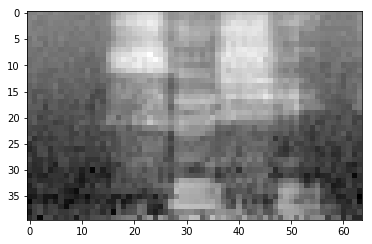

In [53]:
l = ds.class_labels.index('sushi')
image_number = 69

plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')
plt.savefig('input.png')
ds.class_labels[np.argmax(train_labels[l, image_number])]

In [54]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[l])

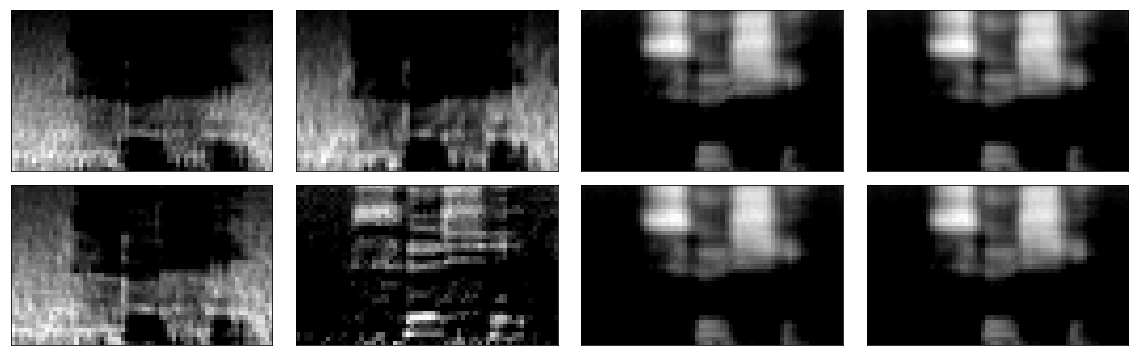

In [55]:
plot_layer(activations, image_number, 0, 4)
plt.savefig('layer0.png')

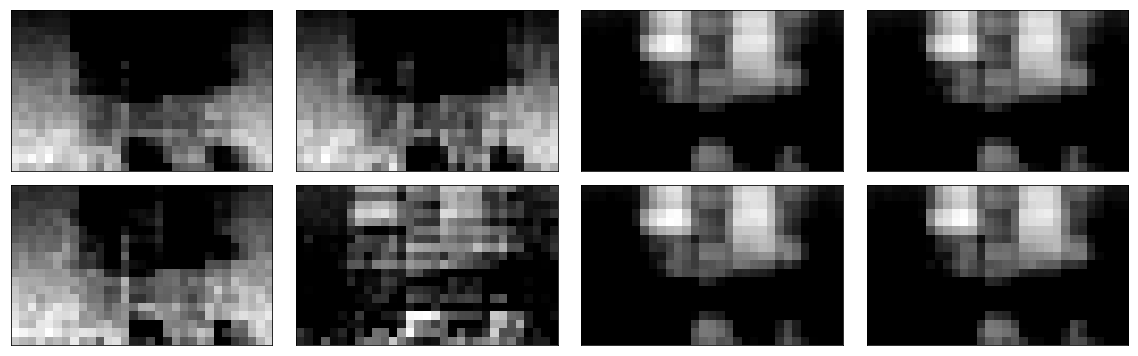

In [56]:
plot_layer(activations, image_number, 1, 4)
plt.savefig('layer1.png')

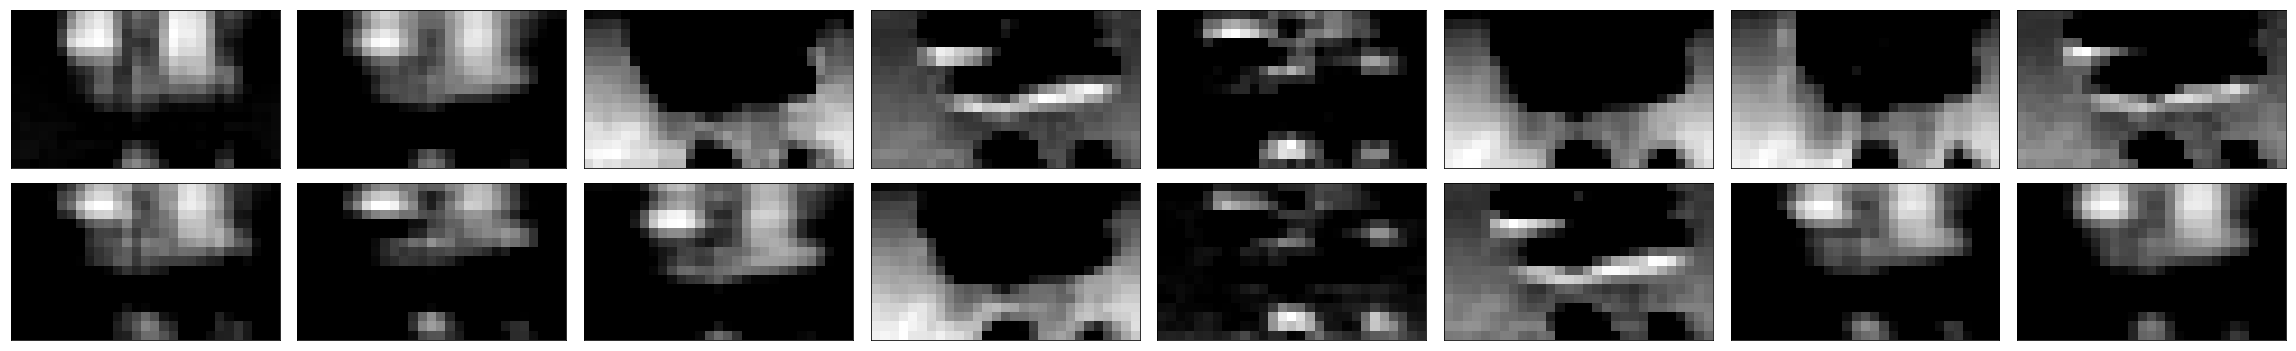

In [57]:
plot_layer(activations, image_number, 3, 8)
plt.savefig('layer3.png')

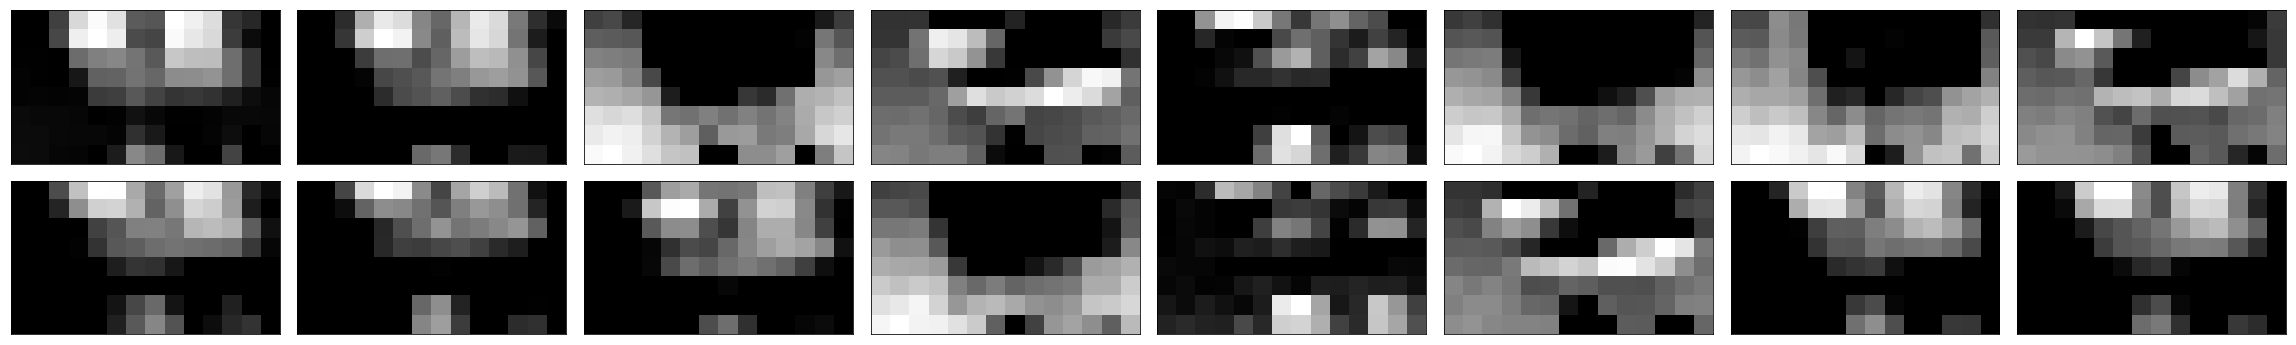

In [58]:
plot_layer(activations, image_number, 4, 8)
plt.savefig('layer4.png')

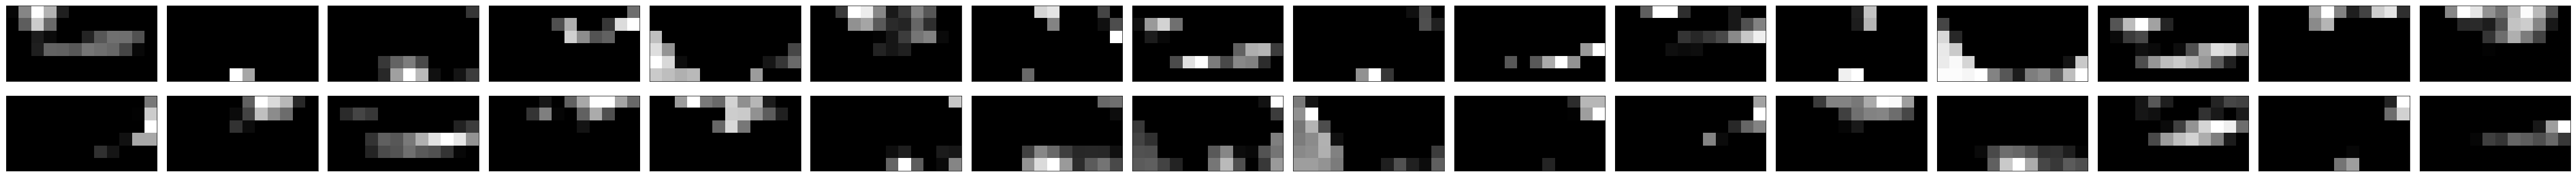

In [59]:
plot_layer(activations, image_number, 6, 16)
plt.savefig('layer4.png')

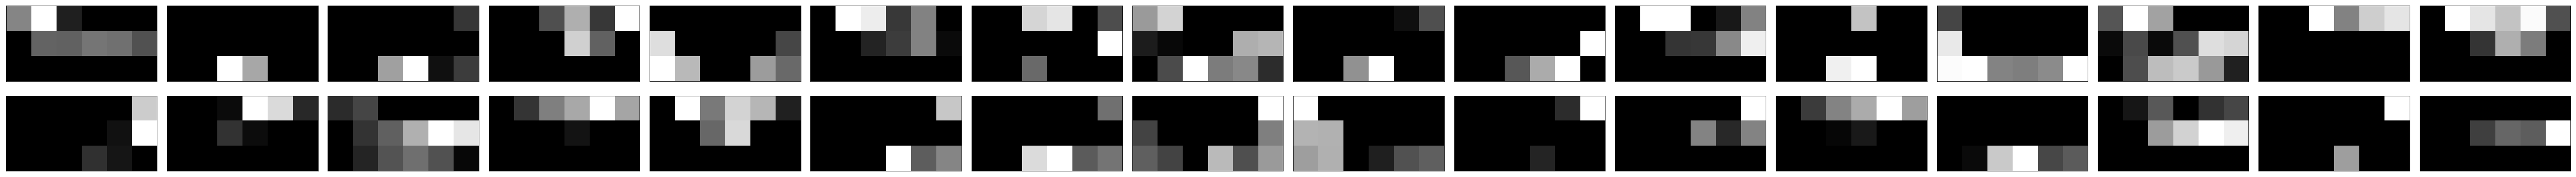

In [60]:
plot_layer(activations, image_number, 7, 16)
plt.savefig('layer5.png')